# 정규분포
정규분포(Normal Distribution)는 통계학과 확률론에서 가장 중요한 연속 확률분포 중 하나로, 많은 자연현상과 사회현상의 데이터들이 이 분포를 따르는 경우가 많습니다.

* 대칭성: 정규분포는 평균 μ를 중심으로 좌우 대칭입니다. 즉, 평균, 중앙값(median), 최빈값(mode)이 모두 동일합니다.
* 종 모양의 곡선 (Bell Curve): 곡선의 중앙이 가장 높고 양쪽으로 갈수록 점점 낮아지는 종 모양을 띕니다. 이로 인해 극단적인 값(양쪽 꼬리 부분)의 확률은 매우 작습니다.
* 중심극한정리 (Central Limit Theorem): 많은 독립적인 확률 변수들의 합(또는 평균)은 분포의 형태에 상관없이 정규분포에 가까워진다는 중요한 이론입니다. 이는 왜 다양한 실제 데이터들이 정규분포를 따르는지에 대한 근본적인 이유를 제공합니다.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import koreanize_matplotlib

# 표준 정규분포 (평균 0, 표준편차 1)를 따르는 n개의 데이터 생성
data = np.random.randn(100000)

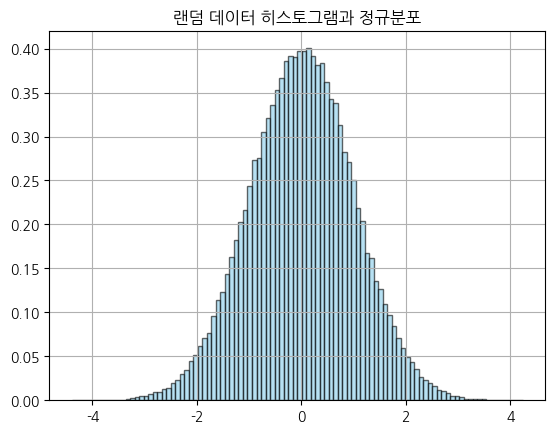

In [13]:
# 히스토그램 그리기 (밀도 정규화: 총 면적이 1이 되도록)
plt.hist(data, bins = 100, density=True, alpha=0.6, color='skyblue', edgecolor='black')

plt.title("랜덤 데이터 히스토그램과 정규분포")
plt.grid()
plt.show()

# 단일 표본 t-검정
단일 표본 검정(One-Sample Test)은 하나의 표본 데이터로부터 계산된 통계량(예: 표본 평균)이 특정한 이론적 모수(예: 모평균)와 차이가 있는지를 검정하는 통계적 방법입니다. 가장 많이 사용되는 방법은 ```단일 표본 t-검정(One-sample t-test)``` 인데, 이는 표본의 분산을 이용하여 표본 평균과 가정한 모평균의 차이가 우연에 의한 것인지 아니면 통계적으로 유의미한지를 판단합니다.

* 정규성 가정: 표본의 크기가 작을 경우, 모집단이 정규분포를 따른다는 가정이 필요합니다. 큰 표본(n≥30)인 경우 중심극한정리에 의해 정규분포에 근사합니다.
* 독립성: 표본 데이터는 서로 독립적이어야 합니다.

In [15]:
import pandas as pd

# 팝콘 라지 사이즈의 무게가 일반적으로 120g 이다.
df = pd.DataFrame({
    'weights':[122, 121, 120, 119, 125, 115, 121, 118, 117, 127,
           123, 129, 119, 124, 114, 126, 122, 124, 121, 116,
           120, 123, 127, 118, 122, 117, 124, 125, 123, 121],
})

In [16]:
# 귀무가설: 팝콘 라지 사이즈의 평균 무게는 120g 이다.
# 대립가설: 팝콘 라지 사이즈의 평균 무게는 120g이 아니다.

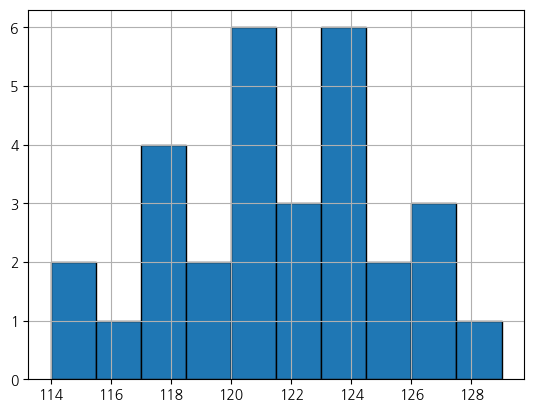

In [17]:
# 차이의 분포를 확인하기 위한 히스토그램
plt.hist(df["weights"], edgecolor='black')
plt.grid()
plt.show()

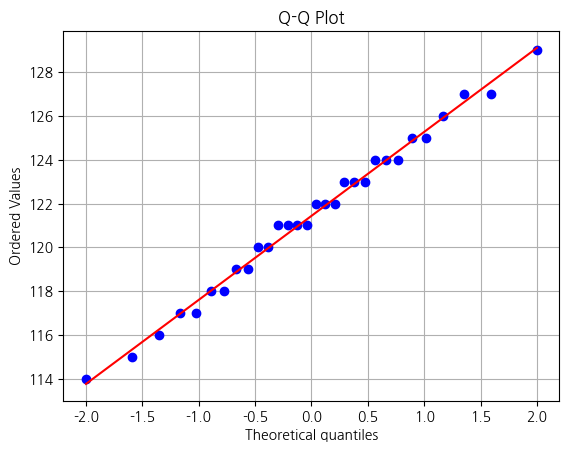

In [18]:
# Q-Q 플롯 그리기
stats.probplot(df["weights"], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid()
plt.show()

In [19]:
# Shapiro-Wilk 검정 수행 // 정규성을 따르는 것을 확인! 만약 따르지 않는다면 Wilcoxson의 부호 순위 검정을 사용.
shapiro_stat, shapiro_p = stats.shapiro(df["weights"])
print("Shapiro-Wilk 통계량:", shapiro_stat)
print("Shapiro-Wilk p-값:", shapiro_p)

Shapiro-Wilk 통계량: 0.9877707598413207
Shapiro-Wilk p-값: 0.9746408136556016


In [20]:
mu0 = 120  # 라벨에 명시된 무게
t_statistic, p_value = stats.ttest_1samp(df["weights"], mu0)
print(t_statistic, p_value)

# 표본 평균이 120보다 2.1 표준오차(standard error)만큼 더 크다는 의미입니다.

2.1155384372682344 0.043092957066609296


In [21]:
# 유의수준(alpha) 설정 후 결과 해석
alpha = 0.05

if p_value < alpha:
    print("결과: 귀무가설 기각 - 실제 평균 팝콘 무게는 120g와 유의미하게 다릅니다.")
else:
    print("결과: 귀무가설 채택 - 실제 평균 팝콘 무게는 120g와 유의미하게 다르지 않습니다.")

결과: 귀무가설 기각 - 실제 평균 팝콘 무게는 120g와 유의미하게 다릅니다.


In [22]:
# 귀무가설: 팝콘 라지 사이즈의 평균 무게는 120g 이다.
# 대립가설: 팝콘 라지 사이즈의 평균 무게는 120g보다 더 크다.

t_statistic, p_value = stats.ttest_1samp(df["weights"], mu0, alternative="greater")
t_statistic, p_value

(2.1155384372682344, 0.021546478533304648)

In [23]:
# 귀무가설: 팝콘 라지 사이즈의 평균 무게는 120g 이다.
# 대립가설: 팝콘 라지 사이즈의 평균 무게는 120g보다 더 작다.

stats.ttest_1samp(df["weights"], mu0, alternative="less")

TtestResult(statistic=2.1155384372682344, pvalue=0.9784535214666953, df=29)

* 만약 정규성을 따르지 않는다면?

In [24]:
# 데이터에서 120을 빼서 차이를 계산 (즉, 중앙값이 0인지 검정)
diff = df["weights"] - 120

# Wilcoxon 부호 순위 검정 수행
w_stat, p_value_w = stats.wilcoxon(diff)
print("Wilcoxon 통계량:", w_stat)
print("Wilcoxon p-값:", p_value_w)

Wilcoxon 통계량: 118.0
Wilcoxon p-값: 0.052221327392073344


## 연습문제
영화관에서 판매하는 팝콘 라지 사이즈의 무게는 다음과 같다. 팝콘 라지 사이즈의 평균 무게가 120g 보다 작다고 할 수 있는가? (유의수준 0.05)

In [25]:
df = pd.DataFrame({
    'weights':[125, 126, 118, 124, 117, 127, 123, 122, 119, 142]
})

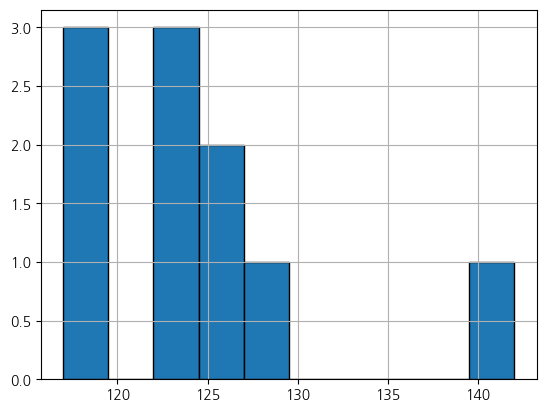

In [26]:
# 차이의 분포를 확인하기 위한 히스토그램
plt.hist(df["weights"], edgecolor='black')
plt.grid()
plt.show()

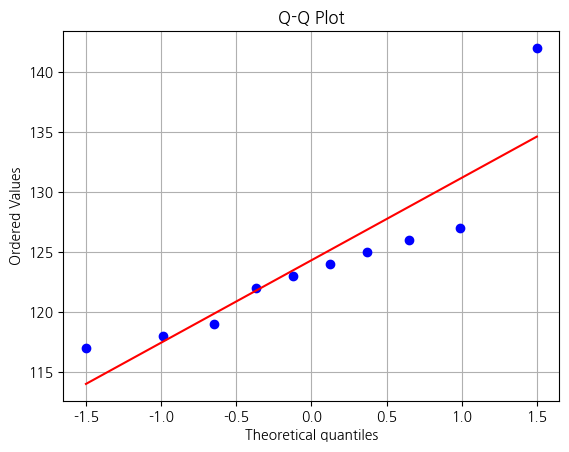

In [27]:
# Q-Q 플롯 그리기
stats.probplot(df["weights"], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid()
plt.show()

In [28]:
stats.shapiro(df['weights'])

ShapiroResult(statistic=0.8164570347000635, pvalue=0.022960129822451016)

In [29]:
# 귀무가설: 팝콘 무게가 중앙값이 120g 이다.
# 대립가설: 팝콘 무게가 중앙값이 120g이 아니다.

# Wilcoxon의 부호 순위 검정 수행
stats.wilcoxon(df['weights'] - 120, alternative='less')

WilcoxonResult(statistic=47.0, pvalue=0.9814453125)